In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [2]:
with open('./train/ml_finalproj_train_vF.pkl', 'rb') as datafile:
    data = pickle.load(datafile)

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.shape

(141163, 31)

In [5]:
data.columns

Index(['timestamp', 'id', 'x22', 'x42', 'x16', 'x17', 'x30', 'x39', 'x37',
       'x2', 'x6', 'x0', 'x46', 'x61', 'x65', 'x53', 'x5', 'x63', 'x49', 'x21',
       'x25', 'x13', 'x28', 'x66', 'x51', 'x9', 'x64', 'x62', 'x29', 'weight',
       'y'],
      dtype='object')

In [6]:
import scipy.stats as stats
all_features = data.columns[2:-2]
for name in all_features:
    x = data.loc[:,name]
    u = np.unique(x)
    if len(u) > 2:
        m = np.nanmean(x)
        v = np.nanvar(x)
        s = stats.skew(x)
        k = stats.kurtosis(x)
        print(name, m, v, s, k, len(u))
    else:
        print(name, 'binary', np.sum(x == u[0]) / len(x), np.sum(x == u[1]) / len(x), len(u))

x22 -2.49851e-06 4.19376e-07 0.06947334110736847 1.3906027115460686 141024
x42 4.21243526987 13.9722129108 0.6440219712076742 -1.1851879161683643 11
x16 8.68856e-07 7.05819e-07 0.04261442646384239 10.823689508332647 140916
x17 -1.90291e-06 4.20618e-07 0.06972139328718185 1.4414799366921818 141041
x30 3.81818890219 13.4699093826 0.8513983782227279 -0.8845972697010187 11
x39 5.41131e-06 3.95474e-07 0.15481634438037872 1.95150736985528 140985
x37 4.87791e-06 3.95223e-07 0.12705552577972412 1.901798716242543 140941
x2 5.17126300801 9.22058574498 0.17829569201054712 -1.2870733706682795 10
x6 5.51981043191 8.48220390702 -0.002497212688078912 -1.2577090900839678 10
x0 -1.1333e-06 4.20281e-07 0.0390949510037899 1.7455164048485203 140825
x46 5.48697604896 8.47320335687 0.0011657037777882894 -1.2561104412368196 10
x61 2.93111e+07 3.75084e+15 3.810758113861084 18.26391968529734 72051
x65 -0.0170924377065 16.0923592453 0.0016622011138208066 -0.011370777401159327 141163
x53 -7.44799e-07 7.44027e-07

In [7]:
ids = np.unique(data['id'])

In [8]:
#for myid in ids:
#    print(myid, len(data.loc[data['id']==myid]))
#data.loc[data['id']==226]

In [9]:
Q_FEATURES = [ 'x22',
               'x16',
               'x17',
               'x39',
               'x37',
               'x0',
               'x61',
               'x65',
               'x53',
               'x5',
               'x63',
               'x49',
               'x21',
               'x66',
               'x9',
               'x64',
               'x62' ]

C_FEATURES = [ 'x42',
               'x30',
               'x2',
               'x6',
               'x46',
               'x25',
               'x13',
               'x28',
               'x51',
               'x29' ]

S_FEATURES = [ 'x49',
               'x53',
               'x16',
               'x9'
             ]

WEIGHT = 'weight'
OUTPUT = 'y'

In [53]:
#for col in Q_FEATURES:
#    print(col)
#    plt.plot(data['timestamp'].values, data[col].values)
#    plt.show()
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [11]:
offset = int(len(data)*5.0/6.0)
data = data[:offset]
data_Q = data[Q_FEATURES]
data_C = data[C_FEATURES]
data_y = data[OUTPUT]
data_w = data[WEIGHT]
data2 = pd.concat([data_y, data_w, data_Q, data_C], axis=1)

In [12]:
# apply sigmoid transformation to a few spiky features
for col in S_FEATURES:
    data2[col] = data2[col].apply(lambda x: 1/(1+np.exp(-x)))

In [13]:
from scipy.stats import pearsonr
from scipy.stats import kendalltau
from scipy.stats import spearmanr

In [14]:
for col in Q_FEATURES:
    res = pearsonr(data_y, data2[col])
    if res[1]<0.03: print(col, res)

x22 (0.025044829, 8.6124691365239267e-18)
x17 (0.017331505, 2.7690299561315448e-09)
x0 (-0.015447929, 1.1670414721036921e-07)
x61 (-0.008094036, 0.0055014415374847522)
x53 (0.015763132128278706, 6.4192577373937291e-08)
x49 (0.012141936450776046, 3.1197320888959779e-05)


In [15]:
for col in Q_FEATURES:
    res = kendalltau(data_y, data2[col])
    if res[1]<0.03: print(col, res)

x22 KendalltauResult(correlation=0.013119436272650659, pvalue=1.4840887330616286e-11)
x17 KendalltauResult(correlation=0.0091770112591652922, pvalue=2.3443299439287937e-06)
x0 KendalltauResult(correlation=-0.011093571287477823, pvalue=1.1483785277296474e-08)
x61 KendalltauResult(correlation=-0.0086436238944911509, pvalue=8.7167309615288398e-06)
x53 KendalltauResult(correlation=0.011611417473857074, pvalue=2.3203190969654803e-09)
x49 KendalltauResult(correlation=0.0092031126569676238, pvalue=2.1943428288535041e-06)


In [16]:
for col in Q_FEATURES:
    res = spearmanr(data_y, data2[col])
    if res[1]<0.03: print(col, res)

x22 SpearmanrResult(correlation=0.019463236552907142, pvalue=2.4546104681770373e-11)
x17 SpearmanrResult(correlation=0.0135425226451493, pvalue=3.4012174452302505e-06)
x0 SpearmanrResult(correlation=-0.016378611701024681, pvalue=1.9335199327305698e-08)
x61 SpearmanrResult(correlation=-0.013487491638065776, pvalue=3.7262333783691303e-06)
x53 SpearmanrResult(correlation=0.017184889936375118, pvalue=3.7595617369913734e-09)
x49 SpearmanrResult(correlation=0.013605001015051117, pvalue=3.0651668151806233e-06)


### x46

In [17]:
data2.groupby(['x46'])['y'].mean()

x46
1    -0.000381
2     0.000012
3    -0.000117
4    -0.000006
5     0.000014
6     0.000169
7     0.000124
8     0.000327
9     0.000711
10    0.000704
Name: y, dtype: float32

In [18]:
data2.groupby(['x46'])['y'].mean().sort_values()

x46
1    -0.000381
3    -0.000117
4    -0.000006
2     0.000012
5     0.000014
7     0.000124
6     0.000169
8     0.000327
10    0.000704
9     0.000711
Name: y, dtype: float32

In [19]:
data2['x46r'] = data2['x46']
data2.loc[data2['x46'] == 2, 'x46r'] = 4
data2.loc[data2['x46'] == 3, 'x46r'] = 2
data2.loc[data2['x46'] == 4, 'x46r'] = 3
data2['x46'] = data2['x46r']
data2.groupby(['x46'])['y'].mean()

x46
1    -0.000381
2    -0.000117
3    -0.000006
4     0.000012
5     0.000014
6     0.000169
7     0.000124
8     0.000327
9     0.000711
10    0.000704
Name: y, dtype: float32

### x51

In [20]:
data2.groupby(['x51'])['y'].mean()

x51
1     0.000169
2     0.000312
3     0.000299
4     0.000642
5     0.000282
6     0.000341
7    -0.000118
8    -0.000404
9    -0.000056
10   -0.000108
11   -0.000625
Name: y, dtype: float32

In [21]:
data2.groupby(['x51'])['y'].mean().sort_values()

x51
11   -0.000625
8    -0.000404
7    -0.000118
10   -0.000108
9    -0.000056
1     0.000169
5     0.000282
3     0.000299
2     0.000312
6     0.000341
4     0.000642
Name: y, dtype: float32

In [22]:
data2['x51r'] = data2['x51']
data2.loc[data2['x51'] == 1, 'x51r'] = 6
data2.loc[data2['x51'] == 2, 'x51r'] = 10
data2.loc[data2['x51'] == 3, 'x51r'] = 9
data2.loc[data2['x51'] == 4, 'x51r'] = 11
data2.loc[data2['x51'] == 5, 'x51r'] = 8
data2.loc[data2['x51'] == 6, 'x51r'] = 7
data2.loc[data2['x51'] == 7, 'x51r'] = 4
data2.loc[data2['x51'] == 8, 'x51r'] = 1
data2.loc[data2['x51'] == 9, 'x51r'] = 5
data2.loc[data2['x51'] == 10, 'x51r'] = 3
data2.loc[data2['x51'] == 11, 'x51r'] = 2
data2['x51'] = data2['x51r']
data2.groupby(['x51'])['y'].mean()

x51
1    -0.000404
2    -0.000625
3    -0.000108
4    -0.000118
5    -0.000056
6     0.000169
7     0.000341
8     0.000282
9     0.000299
10    0.000312
11    0.000642
Name: y, dtype: float32

### x30

In [23]:
data2.groupby(['x30'])['y'].mean()

x30
1     0.000123
2    -0.000392
3    -0.000153
4     0.000020
5    -0.000236
6     0.000033
7     0.000491
8     0.000465
9     0.000365
10    0.000457
11    0.000397
Name: y, dtype: float32

In [24]:
data2.groupby(['x30'])['y'].mean().sort_values()

x30
2    -0.000392
5    -0.000236
3    -0.000153
4     0.000020
6     0.000033
1     0.000123
9     0.000365
11    0.000397
10    0.000457
8     0.000465
7     0.000491
Name: y, dtype: float32

In [25]:
data2['x30r'] = data2['x30']
data2.loc[data2['x30'] == 1, 'x30r'] = 6
data2.loc[data2['x30'] == 2, 'x30r'] = 1
data2.loc[data2['x30'] == 3, 'x30r'] = 4
data2.loc[data2['x30'] == 4, 'x30r'] = 5
data2.loc[data2['x30'] == 5, 'x30r'] = 3
data2.loc[data2['x30'] == 6, 'x30r'] = 2
data2.loc[data2['x30'] == 7, 'x30r'] = 11
data2.loc[data2['x30'] == 8, 'x30r'] = 10
data2.loc[data2['x30'] == 9, 'x30r'] = 8
data2.loc[data2['x30'] == 10, 'x30r'] = 9
data2.loc[data2['x30'] == 11, 'x30r'] = 7
data2['x30'] = data2['x30r']
data2.groupby(['x30'])['y'].mean()

x30
1    -0.000392
2     0.000033
3    -0.000236
4    -0.000153
5     0.000020
6     0.000123
7     0.000397
8     0.000365
9     0.000457
10    0.000465
11    0.000491
Name: y, dtype: float32

### x2

In [26]:
data2.groupby(['x2'])['y'].mean()

x2
1     0.000429
2     0.000570
3     0.000629
4     0.000429
5     0.000320
6     0.000166
7     0.000370
8    -0.000349
9    -0.000180
10   -0.000632
Name: y, dtype: float32

In [27]:
data2.groupby(['x6'])['y'].mean()

x6
1     0.000109
2    -0.000078
3     0.000523
4     0.000516
5     0.000315
6     0.000353
7     0.000355
8     0.000120
9    -0.000232
10   -0.000307
Name: y, dtype: float32

In [28]:
data2.groupby(['x42'])['y'].mean()

x42
1     0.000234
2     0.000314
3     0.000382
4     0.000154
5     0.000136
6     0.000082
7     0.000609
8     0.000122
9     0.000061
10   -0.000296
11   -0.000184
Name: y, dtype: float32

In [29]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
enc = OneHotEncoder()

In [31]:
enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [32]:
enc.n_values_

array([2, 3, 4])

In [33]:
enc.feature_indices_

array([0, 2, 5, 9])

In [34]:
enc.transform([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]]).toarray()

array([[ 1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.],
       [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.]])

In [35]:
pd.concat([data2, pd.get_dummies(data2['x46'])], axis=1)

,y,weight,x22,x16,x17,x39,x37,x0,x61,x65,...,1,2,3,4,5,6,7,8,9,10
0,0.003621,4.568258e+06,-0.000080,0.499864,0.000266,0.000301,0.000027,-0.000166,1.588516e+08,4.147350,...,0,0,0,0,0,0,0,0,0,1
1,-0.009771,2.273641e+06,-0.000037,0.500033,0.000164,-0.001161,-0.000375,0.001069,1.097063e+05,2.513919,...,0,0,0,0,0,0,0,0,0,1
2,-0.002606,2.201148e+06,-0.001730,0.500036,-0.000838,-0.000949,-0.000835,0.000028,3.085710e+06,9.839557,...,0,0,0,0,1,0,0,0,0,0
3,0.004838,1.688822e+06,0.000683,0.499903,-0.001025,-0.000060,0.000325,0.000683,4.485302e+06,7.523090,...,0,0,0,0,0,0,0,0,0,1
4,-0.060220,1.117672e+06,0.001110,0.500011,-0.000649,0.002820,0.000741,-0.000035,7.203841e+05,-2.988206,...,1,0,0,0,0,0,0,0,0,0
5,-0.004408,5.149750e+06,0.000261,0.499911,0.000117,0.000093,-0.000520,0.000237,3.158966e+07,2.968416,...,0,0,0,0,0,0,1,0,0,0
6,-0.003659,2.189214e+06,0.000090,0.500488,-0.000827,0.000239,0.000432,0.000924,9.844974e+05,0.226977,...,0,0,0,0,0,0,0,0,0,1
7,0.001751,1.442226e+06,-0.001093,0.500116,-0.000801,-0.001837,0.001862,-0.000312,1.875462e+06,1.237244,...,0,0,0,0,1,0,0,0,0,0
8,-0.007691,3.759358e+06,0.000711,0.500010,-0.000468,-0.000366,0.001317,0.000002,3.494552e+05,-1.107211,...,1,0,0,0,0,0,0,0,0,0
9,0.004030,1.616069e+06,-0.000420,0.499953,0.000452,0.000080,0.000163,-0.000270,1.686989e+06,-1.241988,...,0,0,0,1,0,0,0,0,0,0


In [36]:
data2['x29']

0         3
1         1
2         1
3         3
4         3
5         1
6         1
7         1
8         3
9         3
10        1
11        3
12        1
13        3
14        1
15        1
16        3
17        3
18        3
19        3
20        3
21        3
22        1
23        1
24        1
25        3
26        3
27        1
28        3
29        3
         ..
117605    1
117606    1
117607    3
117608    3
117609    3
117610    3
117611    3
117612    3
117613    1
117614    1
117615    1
117616    3
117617    3
117618    1
117619    1
117620    3
117621    3
117622    1
117623    1
117624    3
117625    3
117626    1
117627    1
117628    1
117629    1
117630    1
117631    1
117632    3
117633    3
117634    3
Name: x29, dtype: int8

In [37]:
for col in C_FEATURES:
    res = pearsonr(data_y, data2[col])
    if res[1]<0.05: print(col, res)

x42 (-0.0080960409008667862, 0.0054898164172769394)
x30 (0.01084882736241553, 0.0001984383253738141)
x2 (-0.023425693123756242, 9.3158649445217087e-16)
x6 (-0.0080954748733143341, 0.0054930962291068865)
x46 (0.019305462339997512, 3.5454785551038663e-11)
x51 (0.010872632762565056, 0.0001921178224579641)


In [38]:
for col in C_FEATURES:
    res = kendalltau(data_y, data2[col])
    if res[1]<0.05: print(col, res)

x30 KendalltauResult(correlation=0.0077458459187362202, pvalue=0.00035340329994350695)
x2 KendalltauResult(correlation=-0.014896620796005138, pvalue=3.0655050304026046e-13)
x6 KendalltauResult(correlation=-0.0060393571092671626, pvalue=0.0030555184913823325)
x46 KendalltauResult(correlation=0.014504278131371237, pvalue=1.1250908746451233e-12)
x51 KendalltauResult(correlation=0.0066266900854991834, pvalue=0.0025856933856702692)


In [39]:
for col in C_FEATURES:
    res = spearmanr(data_y, data2[col])
    if res[1]<0.05: print(col, res)

x30 SpearmanrResult(correlation=0.010391801559011498, pvalue=0.00036492001812359526)
x2 SpearmanrResult(correlation=-0.021190304079243733, pvalue=3.6328420930909949e-13)
x6 SpearmanrResult(correlation=-0.0090309661111866325, pvalue=0.001951819225897014)
x46 SpearmanrResult(correlation=0.020723716343788029, pvalue=1.173112775753479e-12)
x51 SpearmanrResult(correlation=0.0087767355550580992, pvalue=0.0026101799126416795)


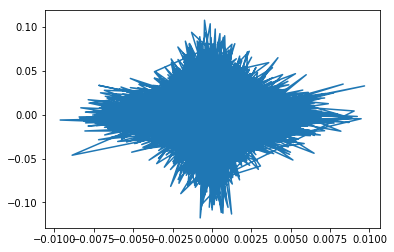

In [40]:
#data['x2_adj'] = data['x2'].apply(lambda x: 1/(1+np.exp(-x)))
plt.plot(data['x53'], data['y'])
plt.show()

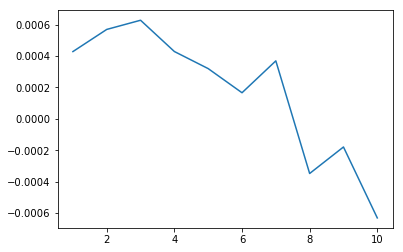

In [41]:
plt.plot(data.groupby(['x2'])['y'].mean())
plt.show()

In [42]:
data2.groupby(['x2'])['y'].mean()

x2
1     0.000429
2     0.000570
3     0.000629
4     0.000429
5     0.000320
6     0.000166
7     0.000370
8    -0.000349
9    -0.000180
10   -0.000632
Name: y, dtype: float32

In [43]:
data2.groupby(['x2'])['y'].mean().sort_values()

x2
10   -0.000632
8    -0.000349
9    -0.000180
6     0.000166
5     0.000320
7     0.000370
1     0.000429
4     0.000429
2     0.000570
3     0.000629
Name: y, dtype: float32

In [44]:
data2['x2r'] = data2['x2']
data2.loc[data2['x2'] == 1,  'x2r'] = 7
data2.loc[data2['x2'] == 2,  'x2r'] = 9
data2.loc[data2['x2'] == 3,  'x2r'] = 10
data2.loc[data2['x2'] == 4,  'x2r'] = 3
data2.loc[data2['x2'] == 5,  'x2r'] = 6
data2.loc[data2['x2'] == 6,  'x2r'] = 5
data2.loc[data2['x2'] == 7,  'x2r'] = 8
data2.loc[data2['x2'] == 8,  'x2r'] = 2
data2.loc[data2['x2'] == 9,  'x2r'] = 4
data2.loc[data2['x2'] == 10, 'x2r'] = 1
data2['x2'] = data2['x2r']
data2.groupby(['x2'])['y'].mean()

x2
1    -0.000632
2    -0.000349
3     0.000429
4    -0.000180
5     0.000166
6     0.000320
7     0.000429
8     0.000370
9     0.000570
10    0.000629
Name: y, dtype: float32

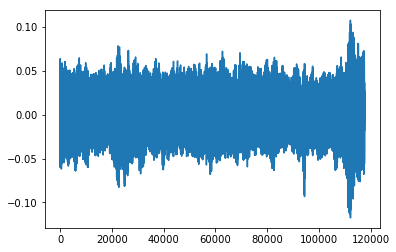

In [45]:
plt.plot(data['y'])
plt.show()

In [46]:
data2 = data2[(np.abs(stats.zscore(data2)) < 3).all(axis=1)]

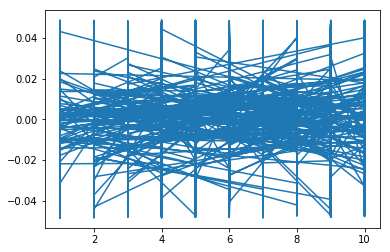

In [47]:
plt.plot(data2['x2'], data2['y'])
plt.show()

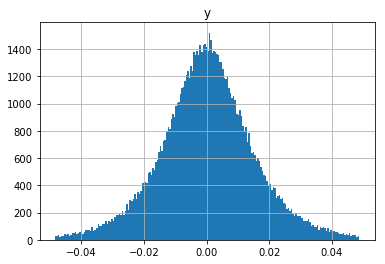

In [50]:
data2.hist(column='y',bins=200)
plt.show()